In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
def decode_grid(ga, phases, ij, kl):
    """
    ga: (3,n)
    phases: (3,2)
    """
    G_ij = lambda i,j: ga[i]/np.cos(phases[i,0]) - ga[j]/np.cos(phases[j,0])
    A_ij = lambda i,j: np.sin(phases[j,0])/np.cos(phases[j,0]) - np.sin(phases[i,0])/np.cos(phases[i,0])
    B_ij = lambda i,j: np.cos(phases[i,1])/np.cos(phases[i,0]) - np.cos(phases[j,1])/np.cos(phases[j,0])
    C_ij = lambda i,j: np.sin(phases[j,1])/np.cos(phases[j,0]) - np.sin(phases[i,1])/np.cos(phases[i,0])
    G_hat = G_ij(0,1)/A_ij(0,1) - G_ij(0,2)/A_ij(0,2)
    B_hat = B_ij(0,1)/A_ij(0,1) - B_ij(0,2)/A_ij(0,2)
    C_hat = C_ij(0,1)/A_ij(0,1) - C_ij(0,2)/A_ij(0,2)
    #print(G_hat, B_hat, C_hat)
    #print(B_hat**2 + C_hat**2 - G_hat**2)
    y1 = 2*np.arctan2((C_hat + np.sqrt(B_hat**2 + C_hat**2 - G_hat**2)), (B_hat + G_hat))
    y2 = 2*np.arctan2((C_hat - np.sqrt(B_hat**2 + C_hat**2 - G_hat**2)), (B_hat + G_hat))
    N = np.sqrt(B_hat**2 + C_hat**2)
    y = np.arcsin(G_hat / N) - np.arcsin(B_hat / N)
    y = y + np.pi * (C_hat < 0)
    
    G_ij_mark = lambda i,j: ga[i]/np.cos(phases[i,1]) - ga[j]/np.cos(phases[j,1])
    A_ij_mark = lambda i,j: np.sin(phases[j,1])/np.cos(phases[j,1]) - np.sin(phases[i,1])/np.cos(phases[i,1])
    B_ij_mark = lambda i,j: np.cos(phases[i,0])/np.cos(phases[i,1]) - np.cos(phases[j,0])/np.cos(phases[j,1])
    C_ij_mark = lambda i,j: np.sin(phases[j,0])/np.cos(phases[j,1]) - np.sin(phases[i,0])/np.cos(phases[i,1])
    G_tilde = G_ij_mark(0,1)/A_ij_mark(0,1) - G_ij_mark(0,2)/A_ij_mark(0,2)
    B_tilde = B_ij_mark(0,1)/A_ij_mark(0,1) - B_ij_mark(0,2)/A_ij_mark(0,2)
    C_tilde = C_ij_mark(0,1)/A_ij_mark(0,1) - C_ij_mark(0,2)/A_ij_mark(0,2)
    #G_tilde = np.cos(x)*B_tilde + np.sin(x)*C_tilde
    x1 = 2*np.arctan2(C_tilde + np.sqrt(B_tilde**2+C_tilde**2-G_tilde**2), B_tilde + G_tilde)
    x2 = 2*np.arctan2(C_tilde - np.sqrt(B_tilde**2+C_tilde**2-G_tilde**2), B_tilde + G_tilde)

    N_tilde = np.sqrt(B_tilde**2 + C_tilde**2)
    x = np.arcsin(G_tilde / N_tilde) - np.arcsin(B_tilde / N_tilde)
    x = x + np.pi * (C_tilde < 0)
    
    #return x1%(2*np.pi), x2%(2*np.pi), y1%(2*np.pi), y2%(2*np.pi)
    return x1, x2, y1, y2
    #return y1, y2, x1, x2
    #return y%(2*np.pi), x%(2*np.pi)


In [4]:
def decode_grid(ga, phases, ij=(0,1), kl=(0,2)):
    """
    ga: (3,n)
    phases: (3,2)
    """
    G_ij = lambda i,j: ga[i]/np.cos(phases[i,0]) - ga[j]/np.cos(phases[j,0])
    A_ij = lambda i,j: np.sin(phases[j,0])/np.cos(phases[j,0]) - np.sin(phases[i,0])/np.cos(phases[i,0])
    B_ij = lambda i,j: np.cos(phases[i,1])/np.cos(phases[i,0]) - np.cos(phases[j,1])/np.cos(phases[j,0])
    C_ij = lambda i,j: np.sin(phases[j,1])/np.cos(phases[j,0]) - np.sin(phases[i,1])/np.cos(phases[i,0])
    G_hat = G_ij(*ij)/A_ij(*ij) - G_ij(*kl)/A_ij(*kl)
    B_hat = B_ij(*ij)/A_ij(*ij) - B_ij(*kl)/A_ij(*kl)
    C_hat = C_ij(*ij)/A_ij(*ij) - C_ij(*kl)/A_ij(*kl)
    #print(G_hat, B_hat, C_hat)
    #print(B_hat**2 + C_hat**2 - G_hat**2)
    y1 = 2*np.arctan2((C_hat + np.sqrt(B_hat**2 + C_hat**2 - G_hat**2)), (B_hat + G_hat))
    y2 = 2*np.arctan2((C_hat - np.sqrt(B_hat**2 + C_hat**2 - G_hat**2)), (B_hat + G_hat))
    N = np.sqrt(B_hat**2 + C_hat**2)
    print(N)
    y = np.arcsin(G_hat / N) - np.arcsin(B_hat / N)
    y = y + np.pi * (C_hat < 0)
    
    G_ij_mark = lambda i,j: ga[i]/np.cos(phases[i,1]) - ga[j]/np.cos(phases[j,1])
    A_ij_mark = lambda i,j: np.sin(phases[j,1])/np.cos(phases[j,1]) - np.sin(phases[i,1])/np.cos(phases[i,1])
    B_ij_mark = lambda i,j: np.cos(phases[i,0])/np.cos(phases[i,1]) - np.cos(phases[j,0])/np.cos(phases[j,1])
    C_ij_mark = lambda i,j: np.sin(phases[j,0])/np.cos(phases[j,1]) - np.sin(phases[i,0])/np.cos(phases[i,1])
    G_tilde = G_ij_mark(*ij)/A_ij_mark(*ij) - G_ij_mark(*kl)/A_ij_mark(*kl)
    B_tilde = B_ij_mark(*ij)/A_ij_mark(*ij) - B_ij_mark(*kl)/A_ij_mark(*kl)
    C_tilde = C_ij_mark(*ij)/A_ij_mark(*ij) - C_ij_mark(*kl)/A_ij_mark(*kl)
    #G_tilde = np.cos(x)*B_tilde + np.sin(x)*C_tilde
    x1 = 2*np.arctan2(C_tilde + np.sqrt(B_tilde**2+C_tilde**2-G_tilde**2), B_tilde + G_tilde)
    x2 = 2*np.arctan2(C_tilde - np.sqrt(B_tilde**2+C_tilde**2-G_tilde**2), B_tilde + G_tilde)

    N_tilde = np.sqrt(B_tilde**2 + C_tilde**2)
    x = np.arcsin(G_tilde / N_tilde) - np.arcsin(B_tilde / N_tilde)
    x = x + np.pi * (C_tilde < 0)
    
    #return x1%(2*np.pi), x2%(2*np.pi), y1%(2*np.pi), y2%(2*np.pi)
    return x1, x2, y1, y2
    #return y1, y2, x1, x2
    #return y%(2*np.pi), x%(2*np.pi)


In [5]:
nx,ny = 2*np.pi,2*np.pi # board size
res = 64

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx, 2*nx, res),
    np.linspace(-ny, 2*ny, res),
)
board = np.stack([xx, yy], axis=-1)

g_i = lambda x,y,phi_x,phi_y: np.cos(x+phi_x) + np.cos(y+phi_y)
phis = np.random.uniform(0,2*np.pi,size=(3,2))
ga = np.array([g_i(xx,yy,*phis[0]), g_i(xx,yy,*phis[1]), g_i(xx,yy,*phis[2])])

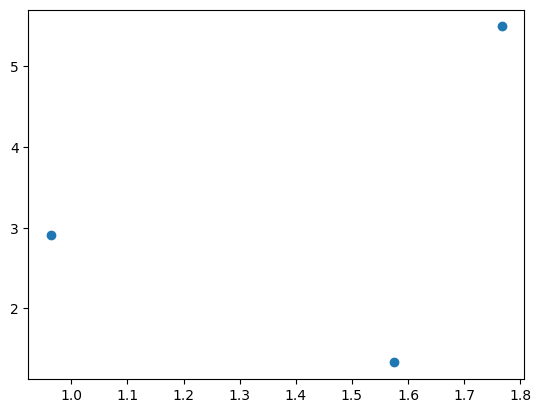

In [6]:
plt.scatter(*phis.T)

In [7]:
out = decode_grid(ga, phis, ij=(0,1), kl=(0,2))
out1 = decode_grid(ga, phis, ij=(0,1), kl=(0,2))
out2 = decode_grid(ga, phis, ij=(0,1), kl=(1,2))
out3 = decode_grid(ga, phis, ij=(0,2), kl=(1,2))

0.03821762483330266
0.03821762483330266
1.5063820510169001
1.4681644261835973


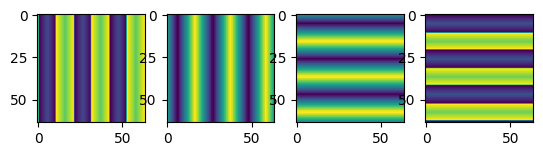

In [8]:
fig,axs = plt.subplots(ncols=4)
_=[axs[i].imshow(out1[i]) for i in range(4)]

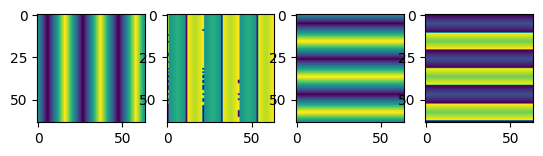

In [9]:
fig,axs = plt.subplots(ncols=4)
_=[axs[i].imshow(out2[i]) for i in range(4)]

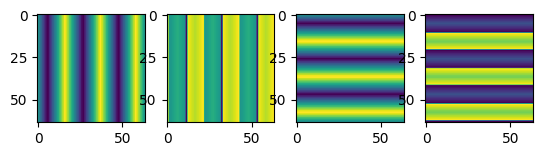

In [10]:
fig,axs = plt.subplots(ncols=4)
_=[axs[i].imshow(out3[i]) for i in range(4)]

In [11]:
idx=0
[out[i][idx,idx] for i in range(4)], xx[idx,idx]%(2*np.pi), yy[idx,idx]%(2*np.pi)

([0.0, -2.8811450529648233, 3.053225788660728, 0.0], 0.0, 0.0)

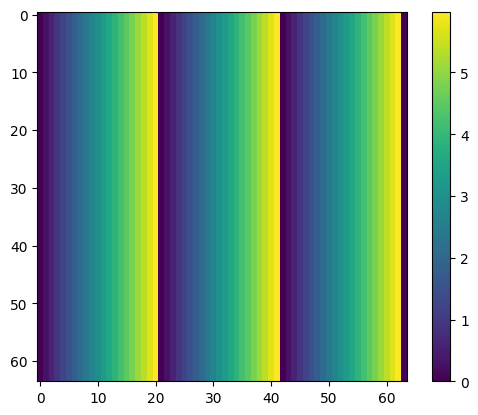

In [12]:
plt.imshow(xx%(2*np.pi))
plt.colorbar()

In [13]:
eps = 1e-6
maskx0 = abs(out[0] - xx < eps)
maskx1 = abs(out[1] - xx < eps)
masky0 = abs(out[2] - yy < eps)
masky1 = abs(out[3] - yy < eps)

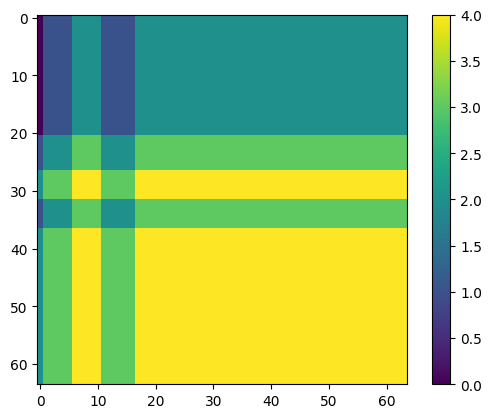

In [14]:
plt.imshow(maskx0.astype(int) + maskx1.astype(int) + masky0.astype(int) + masky1.astype(int))
plt.colorbar()

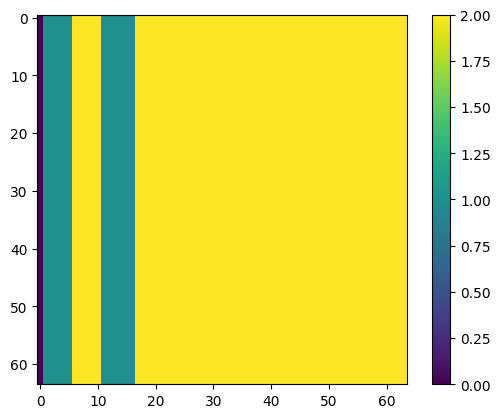

In [15]:
plt.imshow(maskx0.astype(int) + maskx1.astype(int))
plt.colorbar()

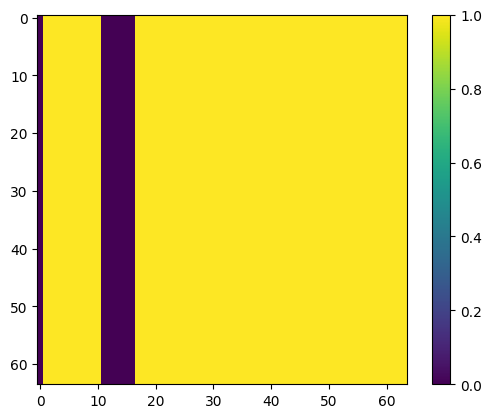

In [16]:
plt.imshow(maskx0.astype(int))
plt.colorbar()

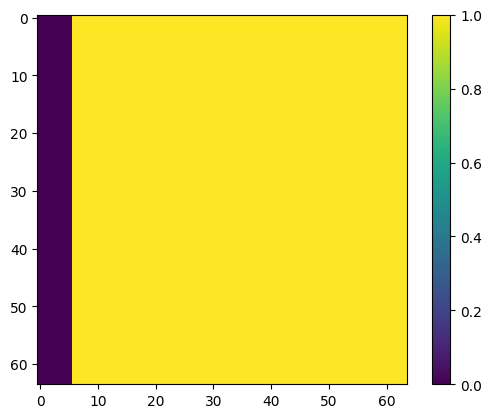

In [17]:
plt.imshow(maskx1.astype(int))
plt.colorbar()

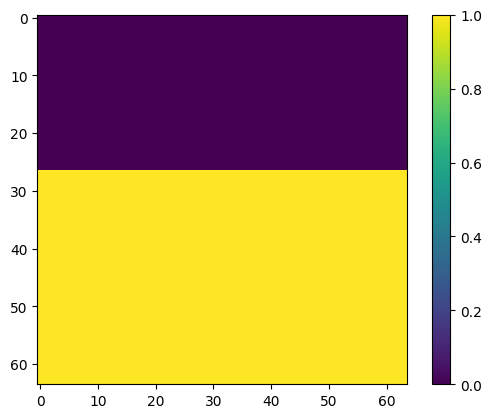

In [18]:
plt.imshow(masky0.astype(int))
plt.colorbar()

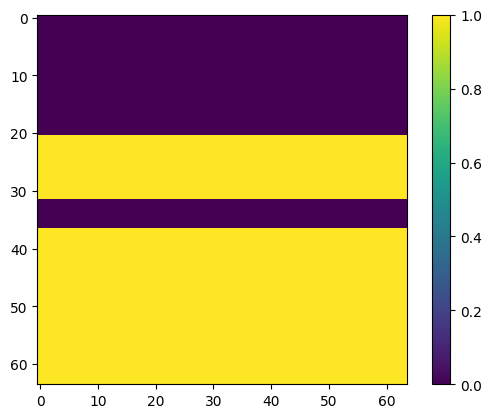

In [19]:
plt.imshow(masky1.astype(int))
plt.colorbar()

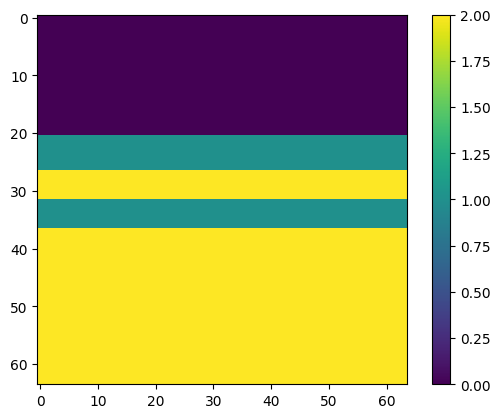

In [20]:
plt.imshow(masky0.astype(int) + masky1.astype(int))
plt.colorbar()

In [21]:
image = maskx0.astype(int) + maskx1.astype(int) + masky0.astype(int) + masky1.astype(int)
phase_mask = np.linalg.norm(phis[0] - board%(2*np.pi),axis=-1) < 0.1
phase_mask = phase_mask | (np.linalg.norm(phis[1] - board%(2*np.pi),axis=-1) < 0.1)
phase_mask = phase_mask | (np.linalg.norm(phis[2] - board%(2*np.pi),axis=-1) < 0.1)
image[phase_mask] = 5

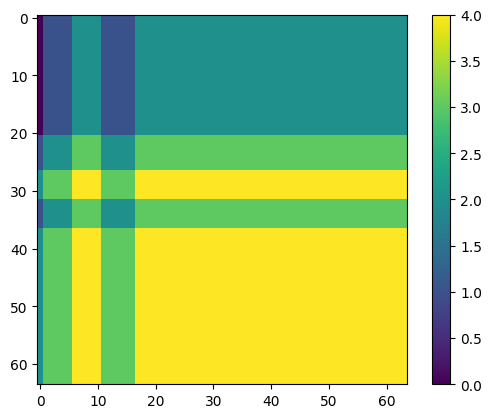

In [22]:
plt.imshow(image)
plt.colorbar()

In [23]:
phis[0]

array([1.57474346, 1.33094393])

In [24]:
board.shape

(64, 64, 2)

In [25]:
phis.shape, board.shape

((3, 2), (64, 64, 2))